In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_info.csv')
display(df)

,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


In [3]:
exclude_columns = ["CustomerID", "Is_UK"]
scale_columns = df.columns.difference(exclude_columns)

In [4]:
scaled_df = df.copy()
display(scaled_df)

,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardize dataset
scaled_df[scale_columns] = scaler.fit_transform(scaled_df[scale_columns])
scaled_df.head()

,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,2.316176,-0.329690,-0.229846,-0.705098,-0.270625,-1.076916,1,0.114243,2.215616,-0.229846,-0.450541,-0.282559,0.053881,-0.852531
1,12347,-0.893205,0.220845,0.291613,0.489897,-0.095163,0.654246,0,-0.394774,-0.602781,0.291613,0.162554,0.231019,0.063530,-0.852531
2,12348,-0.170103,-0.109476,-0.055957,-0.470785,0.606685,2.818198,0,-0.394774,-0.602781,-0.055957,-0.092760,0.024433,-0.163112,0.229757
3,12349,-0.724811,-0.439797,-0.053500,0.126713,-0.270625,-1.509706,0,-0.394774,-0.602781,-0.053500,1.000808,-0.282559,0.053881,-1.393674
4,12350,2.157688,-0.439797,-0.194227,-0.529363,-0.270625,1.519827,0,-0.394774,-0.602781,-0.194227,-0.157394,-0.282559,0.053881,-0.311387


In [6]:
from sklearn.decomposition import PCA

In [7]:
scaled_df.interpolate(method="linear", inplace=True)

In [8]:
print(scaled_df.isnull().sum())

CustomerID                 0
Recency                    0
Frequency                  0
Monetary                   0
UniqueItemsPurchased       0
AvgDaysBetweenPurchases    0
FavoriteShoppingHour       0
Is_UK                      0
Cancellation_Frequency     0
Cancellation_Rate          0
Total_Spend                0
Monthly_Spending_Mean      0
Monthly_Spending_Std       0
Spending_Trend             0
FavoriteShoppingDay        0
dtype: int64


In [9]:
scaled_df.set_index("CustomerID", inplace=True)
pca = PCA().fit(scaled_df)

In [10]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

for i in range(len(explained_variance_ratio)):
    
    print(f"The Explained vaiance ratio is: {explained_variance_ratio[i]}")
    print(f"The Cumulated vaiance is: {cumulative_explained_variance[i]}")

The Explained vaiance ratio is: 0.3331347393949011
The Cumulated vaiance is: 0.3331347393949011
The Explained vaiance ratio is: 0.13160197805798543
The Cumulated vaiance is: 0.4647367174528866
The Explained vaiance ratio is: 0.0949669265455981
The Cumulated vaiance is: 0.5597036439984847
The Explained vaiance ratio is: 0.08489614898833564
The Cumulated vaiance is: 0.6445997929868204
The Explained vaiance ratio is: 0.07862059399636091
The Cumulated vaiance is: 0.7232203869831813
The Explained vaiance ratio is: 0.07160205142087625
The Cumulated vaiance is: 0.7948224384040575
The Explained vaiance ratio is: 0.06961528008052155
The Cumulated vaiance is: 0.8644377184845791
The Explained vaiance ratio is: 0.05419939238385167
The Cumulated vaiance is: 0.9186371108684307
The Explained vaiance ratio is: 0.030275089613183936
The Cumulated vaiance is: 0.9489122004816146
The Explained vaiance ratio is: 0.027055692996724057
The Cumulated vaiance is: 0.9759678934783387
The Explained vaiance ratio is

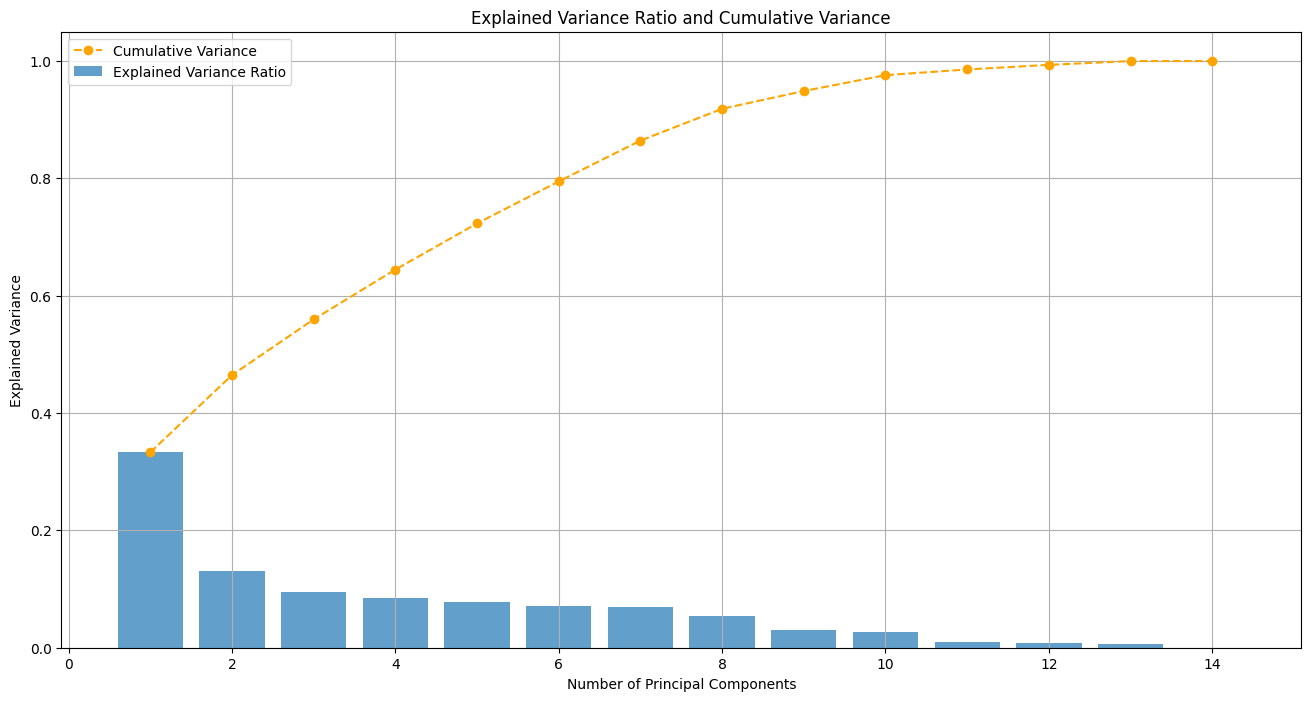

In [11]:
# Plotting cumulative explained variance
plt.figure(figsize=(16, 8))

# Bar plot for explained variance ratio
plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    alpha=0.7,
    label="Explained Variance Ratio"
)

# Line plot for cumulative explained variance
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
    linestyle="--",
    color="orange",
    label="Cumulative Variance"
)

plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio and Cumulative Variance")
plt.legend()
plt.grid()
plt.show()

In [12]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(df_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_pca.index = scaled_df.index

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346,-0.844945,0.202893,-2.304511,-0.318302,-2.179465,1.322048
12347,0.592303,-0.198668,0.664946,-0.123590,0.214412,-1.387428
12348,-0.468969,-0.456501,0.769219,1.417063,1.048184,-0.643466
12349,0.064523,-0.626101,-0.047189,-1.533161,-0.504992,-1.199122
12350,-1.123006,-0.982805,0.149546,1.160545,-1.211648,0.183330


## KMeans

In [13]:
from sklearn.cluster import KMeans

In [14]:
from yellowbrick.cluster import KElbowVisualizer

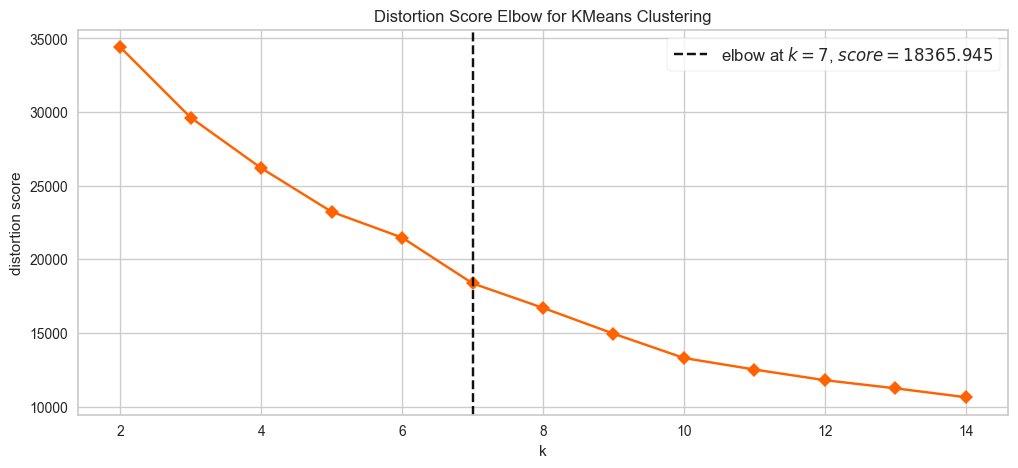

In [15]:


sns.set_palette(['#ff6200'])

# Instantiating the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=500, random_state=42)

# Creating a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

#Instantiating the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

visualizer.fit(df_pca)

# Finalize and render the figure
visualizer.show();

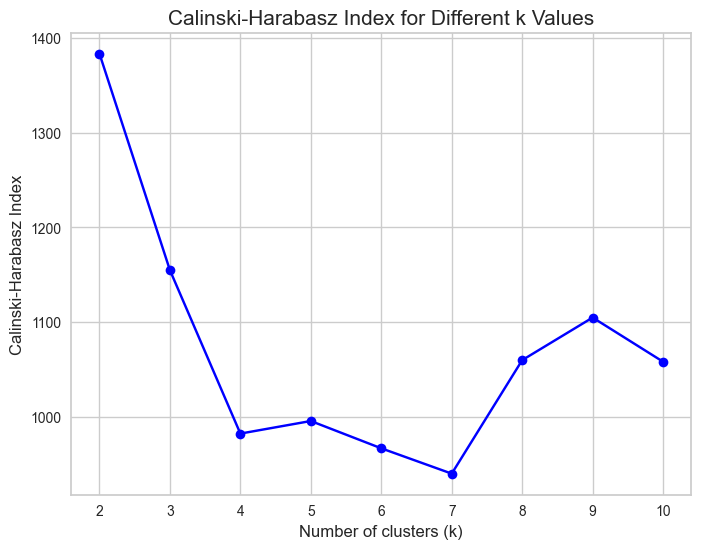

k = 2, CH Index = 1383.18
k = 3, CH Index = 1154.96
k = 4, CH Index = 982.70
k = 5, CH Index = 995.95
k = 6, CH Index = 967.17
k = 7, CH Index = 940.47
k = 8, CH Index = 1060.12
k = 9, CH Index = 1105.00
k = 10, CH Index = 1058.42


In [16]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
import numpy as np

# Range of k values to evaluate
k_values = range(2, 11)  
ch_scores = []

# Calculate CH Index for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    ch_score = calinski_harabasz_score(df_pca, kmeans.labels_)
    ch_scores.append(ch_score)

# Plot the CH Index scores to evaluate the best k
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(k_values, ch_scores, marker='o', color='blue')
plt.title('Calinski-Harabasz Index for Different k Values', fontsize=15)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Calinski-Harabasz Index', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()


for k, score in zip(k_values, ch_scores):
    print(f'k = {k}, CH Index = {score:.2f}')

/var/folders/vd/qkvh43g14lgg12ynqx64yg6m0000gn/T/ipykernel_5941/2749646430.py:69: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


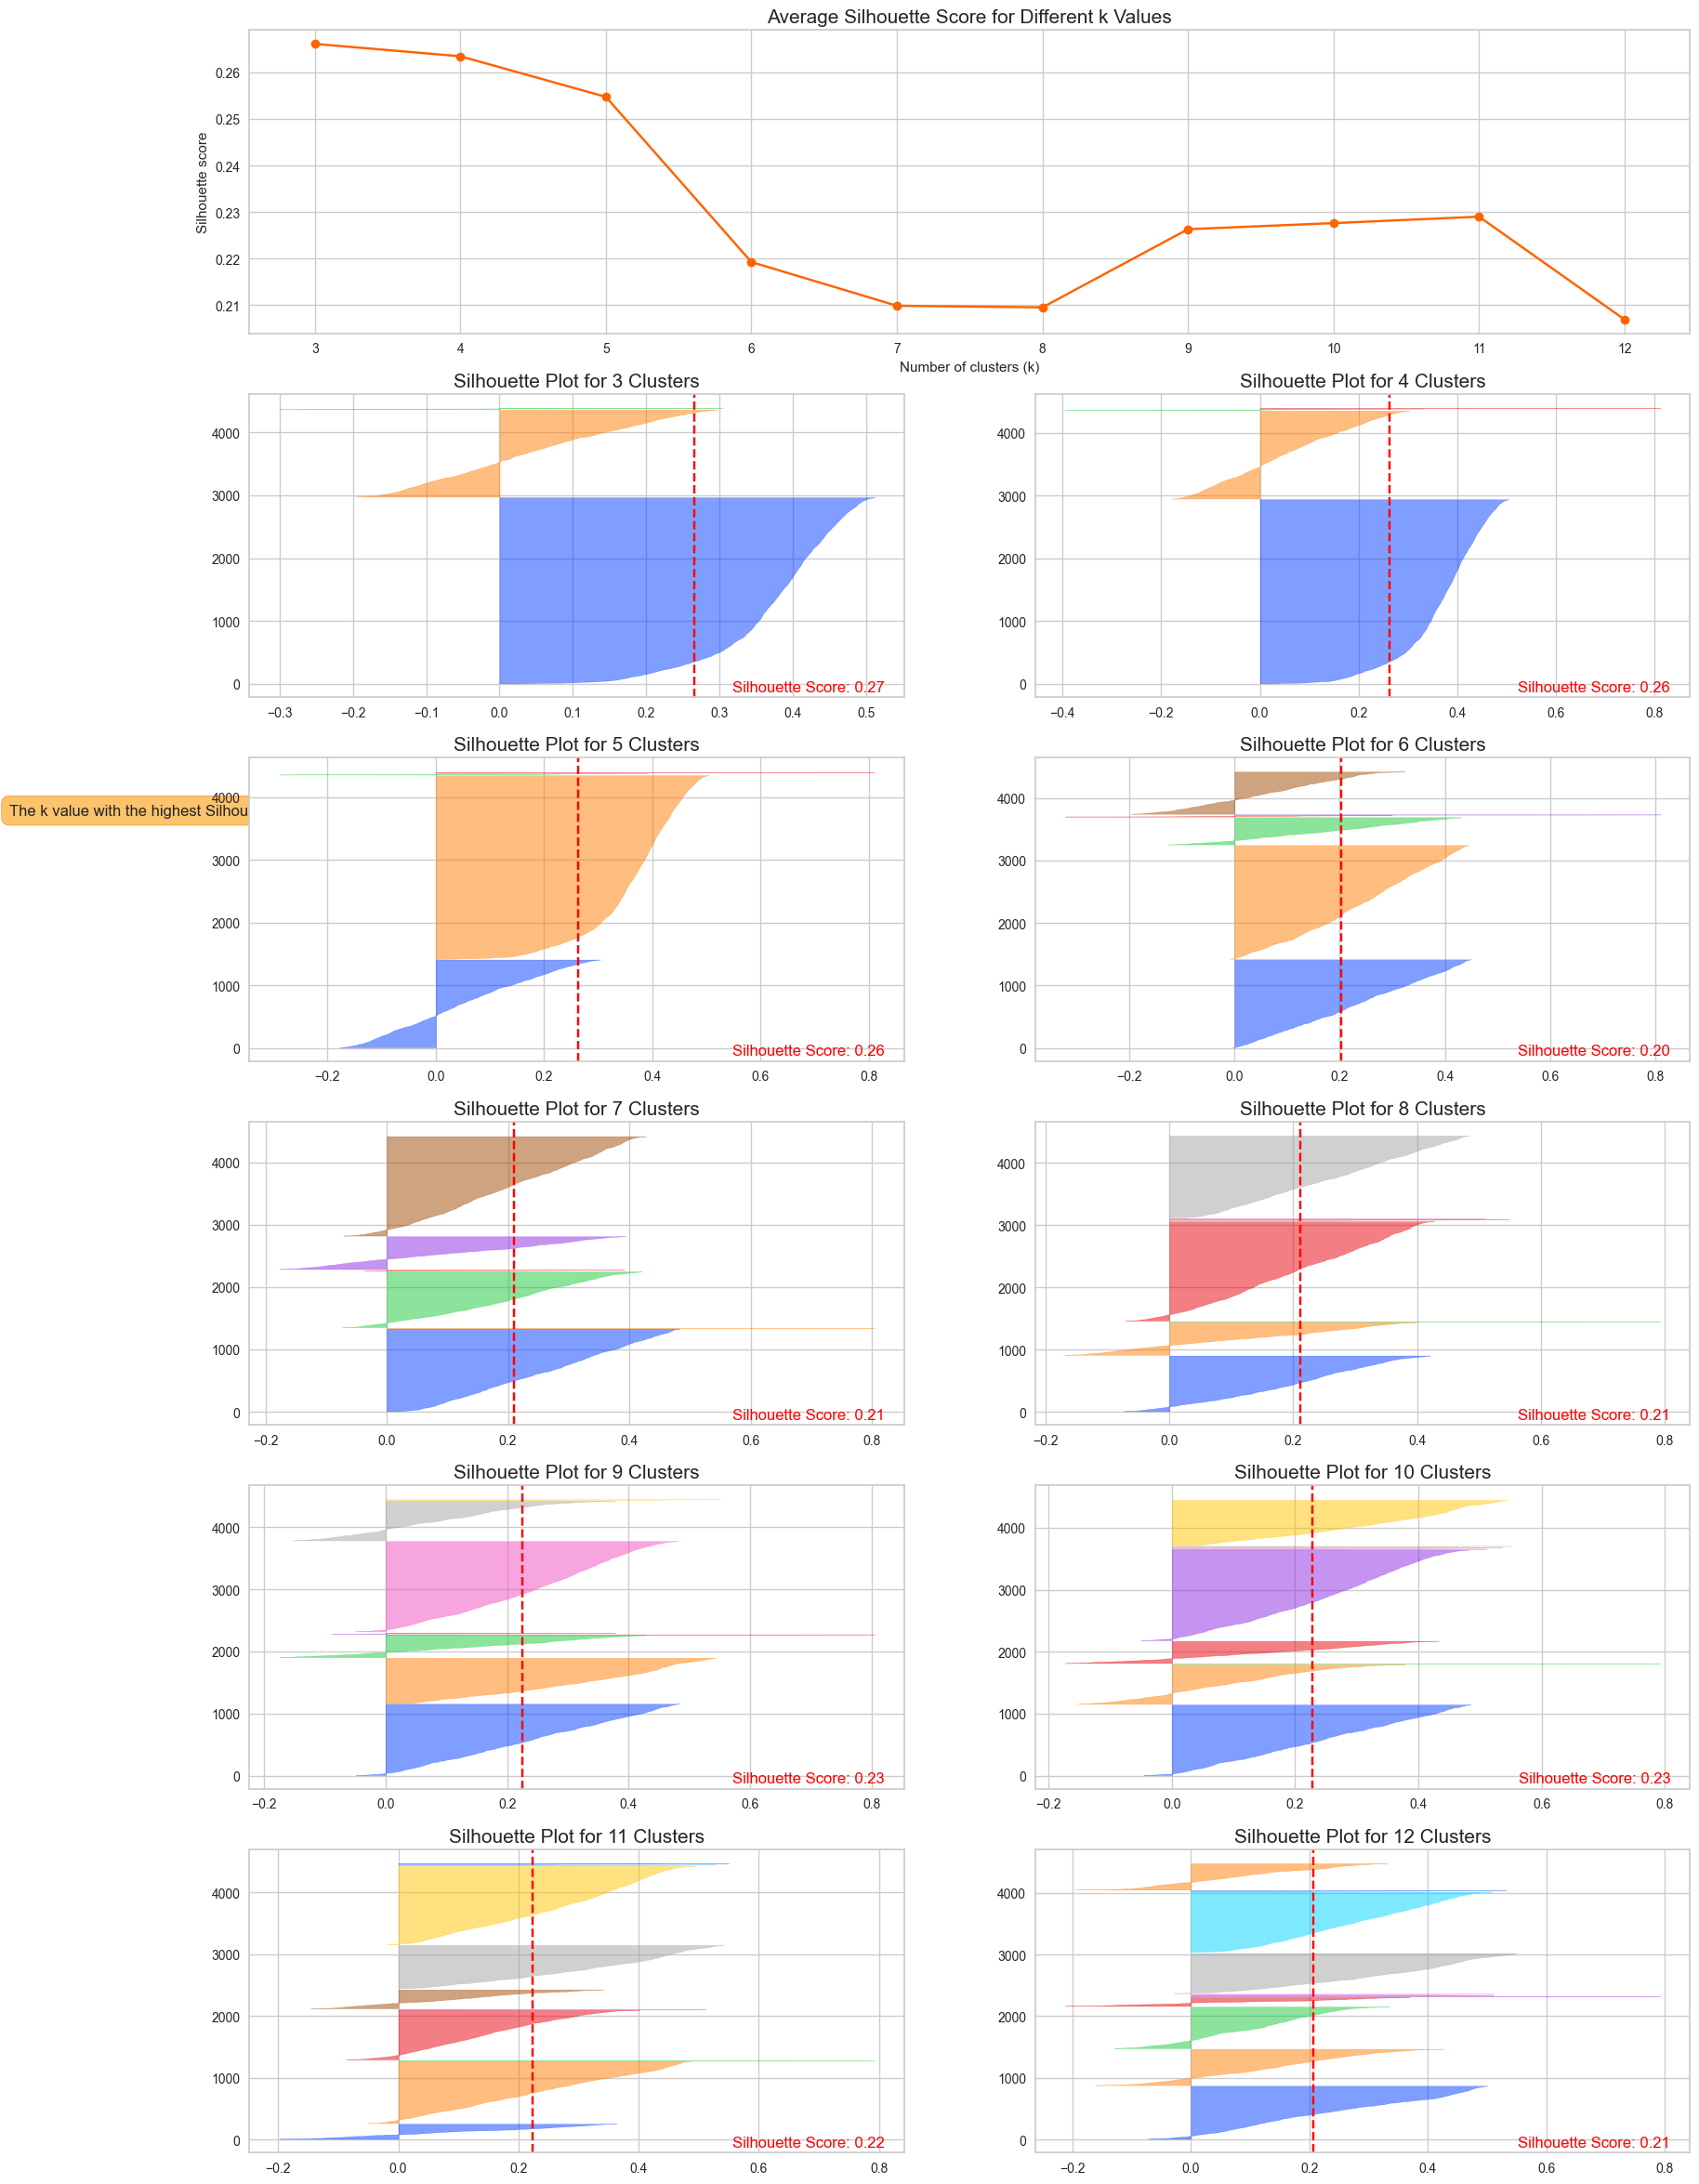

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # Import gridspec for layout
import seaborn as sns

# Function to perform Silhouette analysis for different k values and visualize results
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """
    
    plt.figure(figsize=figsize)

    
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    
    first_plot = plt.subplot(grid[0, :])

    
    sns.set_palette(['darkorange'])
    silhouette_scores = []

    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    # Plot silhouette scores for different k values
    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(0.9, 0.1, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))

    colors = sns.color_palette("bright")

    # Iterate through the range of k values and create Silhouette Plots
    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        # Use Yellowbrick's SilhouetteVisualizer
        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12,
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()


# Run the silhouette analysis
silhouette_analysis(df_pca, 3, 12, figsize=(20, 50))


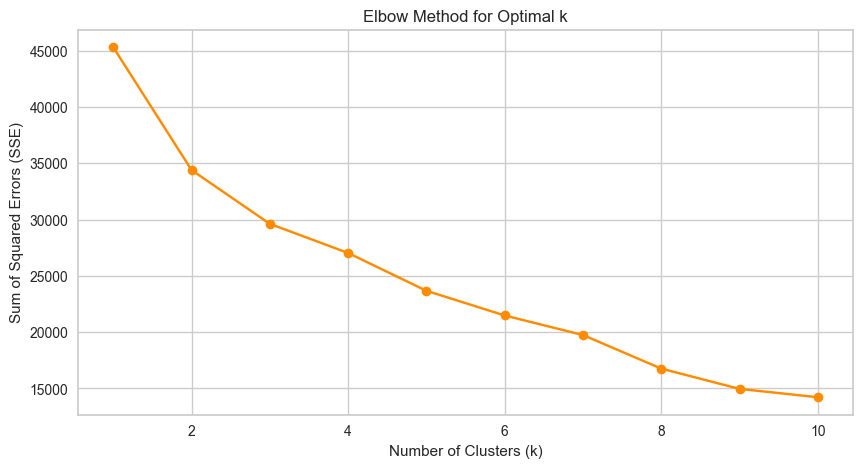

In [18]:
sse = []  # Sum of Squared Errors for each k
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [19]:
optimal_k = 5  # Set this based on your Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

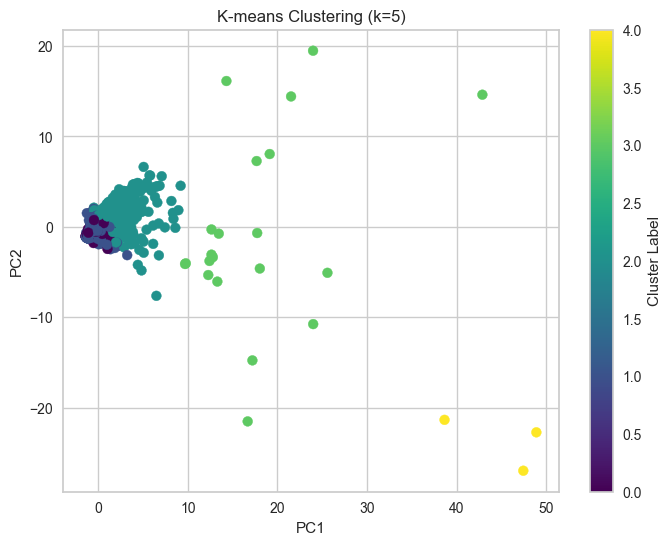

In [20]:
import matplotlib.pyplot as plt

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', s=50)
plt.title(f'K-means Clustering (k={optimal_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()


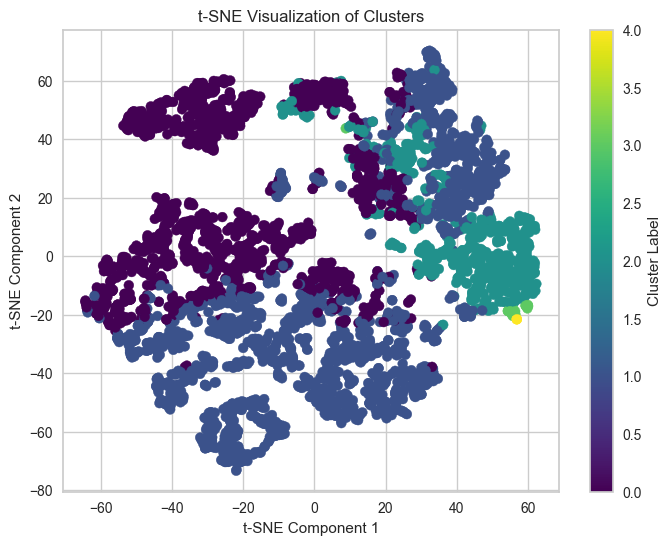

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
df_pca['tSNE1'], df_pca['tSNE2'] = zip(*tsne.fit_transform(df_pca.drop('Cluster', axis=1)))  # Exclude the cluster column

# Plotting the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['tSNE1'], df_pca['tSNE2'], c=df_pca['Cluster'], cmap='viridis', s=50)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

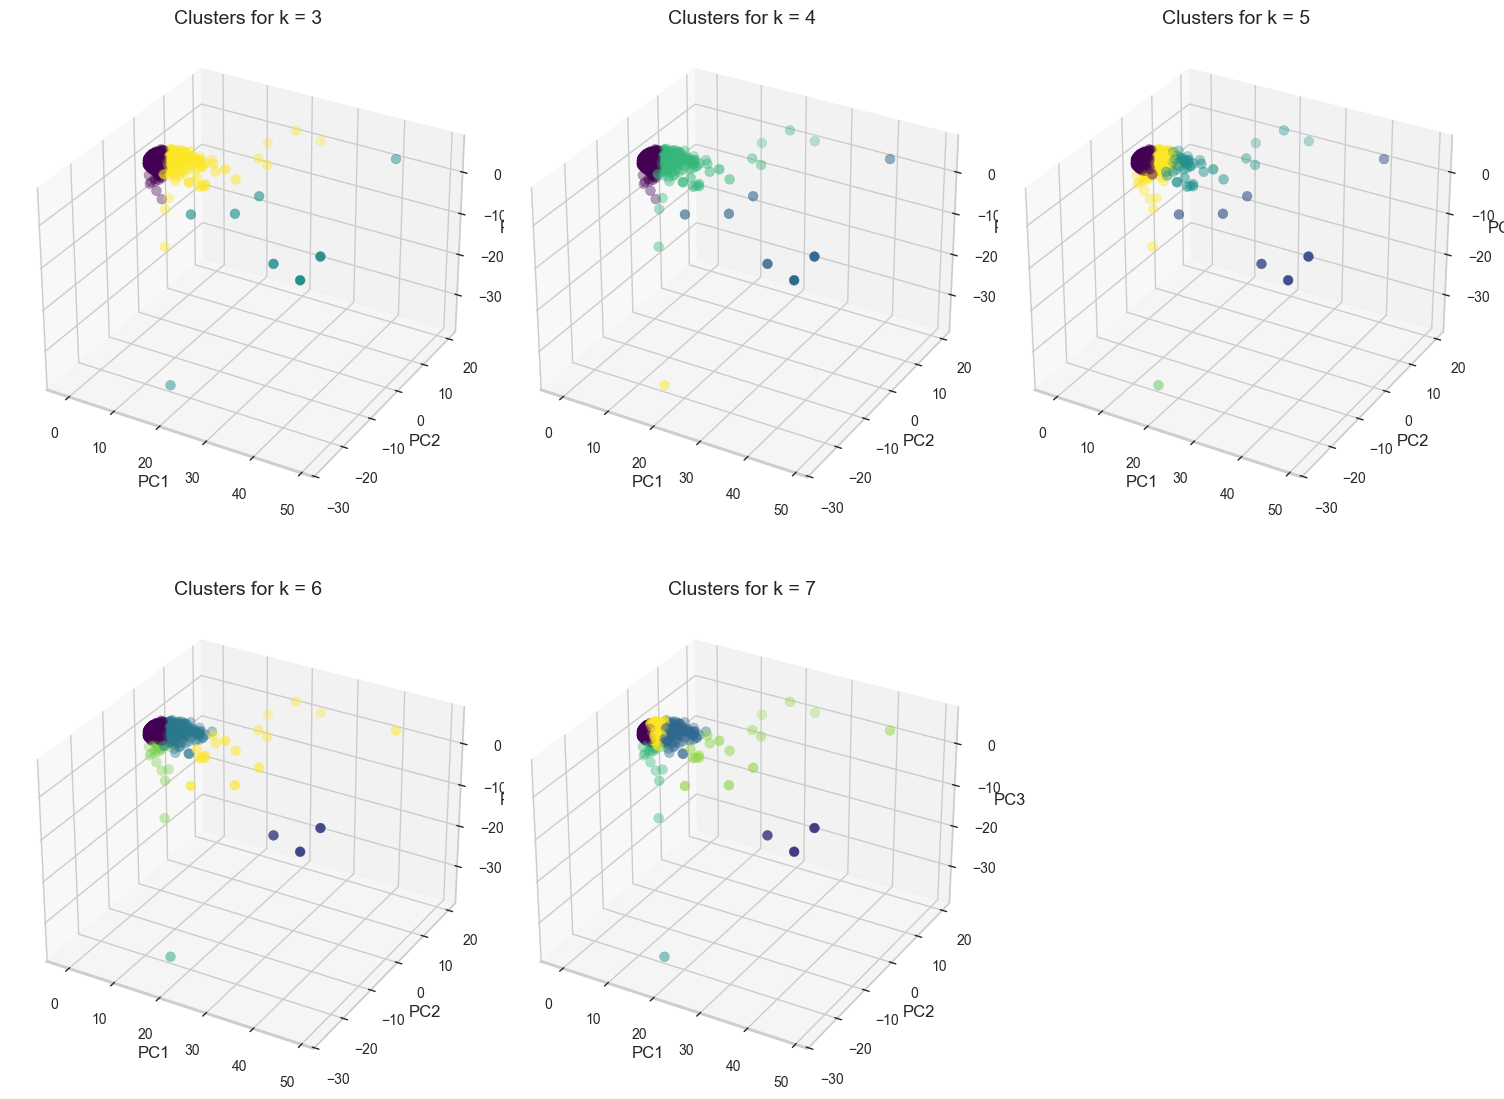

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of cluster values (from 3 to 7)
k_values = range(3, 8)

# Plotting
fig = plt.figure(figsize=(15, 12))

# Loop over each k value to generate KMeans clustering and 3D plots
for idx, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])  # Clustering based on the first 3 PCs

    ax = fig.add_subplot(2, 3, idx, projection='3d')
    ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis', s=50)

    ax.set_title(f'Clusters for k = {k}', fontsize=14)
    ax.set_xlabel('PC1', fontsize=12)
    ax.set_ylabel('PC2', fontsize=12)
    ax.set_zlabel('PC3', fontsize=12)

plt.tight_layout()
plt.show()
